In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

### Importing all the libraries for the ananlysis

In [2]:
train_data = pd.read_csv('healthcare-dataset-stroke-data.csv') # importing dataset .csv file 

In [3]:
train_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
train_data.dtypes        #checking datatype for columns in the dataset

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
train_data.isnull().sum()     #checking if we have any null values in the dataset

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
train_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
train_data['stroke'].value_counts(normalize=True)     #counting the value of stroke column by normalizing

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [8]:
train_data['bmi'].round()  #Rounding the values of Bmi column so that we can convert it to int

0       37.0
1        NaN
2       32.0
3       34.0
4       24.0
        ... 
5105     NaN
5106    40.0
5107    31.0
5108    26.0
5109    26.0
Name: bmi, Length: 5110, dtype: float64

In [9]:
train_data.describe()  # this shows the mathematical ground for each feature

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Checking for Null values

Manipulating the null value

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [11]:
train_data.isnull().sum()     # checking total number of null values in the dataset 

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
train_data.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [13]:
#Changing Bmi null value to mean values of Bmi as for health purpose Average Bmi is calculated
train_data['bmi'] = train_data['bmi'].fillna(train_data['bmi'].mean())

In [14]:
train_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [15]:
train_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [16]:
train_data.describe() #after changing the null values we can see there was a difference in the Bmi column 

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [17]:
train_data['bmi'] = train_data['bmi'].round()
#Bmi = train_data['bmi'].astype(int)



In [18]:
train_data['bmi']


0       37.0
1       29.0
2       32.0
3       34.0
4       24.0
        ... 
5105    29.0
5106    40.0
5107    31.0
5108    26.0
5109    26.0
Name: bmi, Length: 5110, dtype: float64

In [19]:
Bmi = train_data['bmi']

In [20]:
Bmi


0       37.0
1       29.0
2       32.0
3       34.0
4       24.0
        ... 
5105    29.0
5106    40.0
5107    31.0
5108    26.0
5109    26.0
Name: bmi, Length: 5110, dtype: float64

In [21]:
train_data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [22]:
train_data['stroke'].value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

<AxesSubplot:xlabel='stroke'>

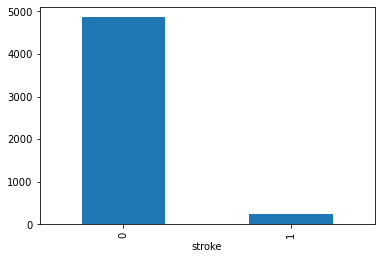

In [23]:
train_data['stroke'].value_counts().plot.bar(xlabel='stroke')  #Plotting bar to check the count of strokes in simple way


In [24]:
train_data['ever_married'].value_counts()


Yes    3353
No     1757
Name: ever_married, dtype: int64

<AxesSubplot:>

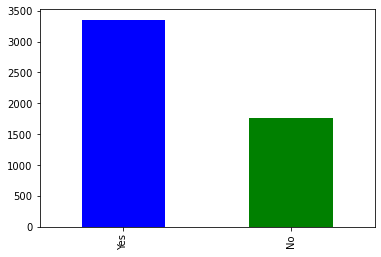

In [25]:
train_data['ever_married'].value_counts().plot(kind='bar', color=['b','g'])  #simmilarly we will do the same method for checking for all the columns

### Plotting and Analysis using seaborn

<AxesSubplot:xlabel='hypertension', ylabel='count'>

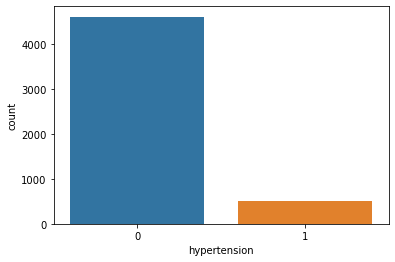

In [26]:
sns.countplot(train_data['hypertension'])   #here we check the number of people who has hypertension 

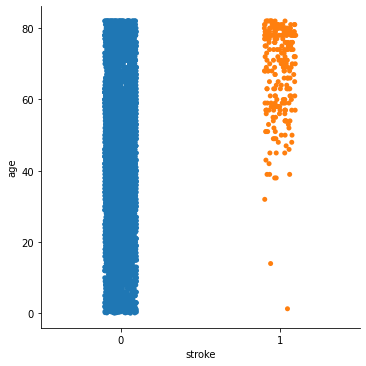

In [27]:
sns.catplot(x='stroke',y='age', data=train_data)   #This graph shows number stroke with comparison to age factor

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

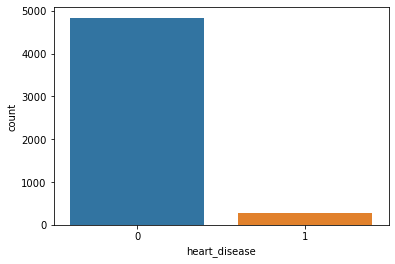

In [28]:
sns.countplot(train_data['heart_disease'])

<AxesSubplot:xlabel='ever_married', ylabel='count'>

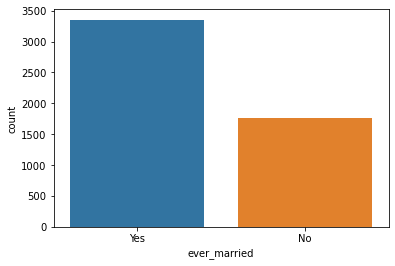

In [29]:
sns.countplot(train_data['ever_married'])

<AxesSubplot:xlabel='bmi', ylabel='count'>

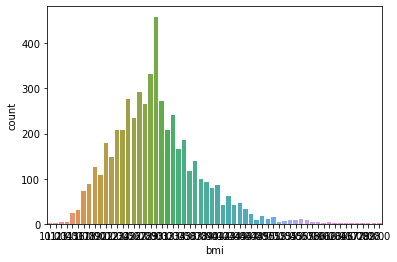

In [30]:
sns.countplot(train_data['bmi']) #Numerical Variable of bmi is higher for most of the people

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

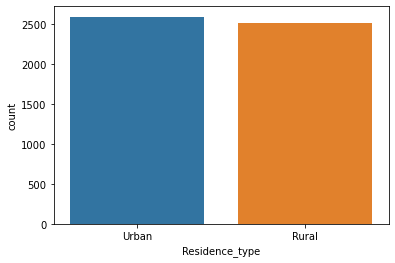

In [31]:
sns.countplot(train_data['Residence_type']) #This graph shows there are equal number of people living in rural and urban area

<AxesSubplot:xlabel='gender', ylabel='count'>

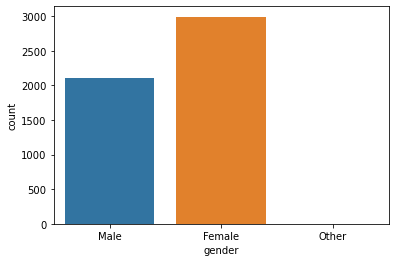

In [32]:
sns.countplot(train_data['gender'])   #this graph the dataset is more bended towards female values

<AxesSubplot:xlabel='avg_glucose_level', ylabel='count'>

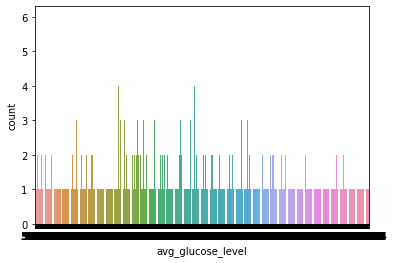

In [33]:
sns.countplot(train_data['avg_glucose_level'])  #Numerical variable  showing glucose level spike for total number of people

### Independent Variable

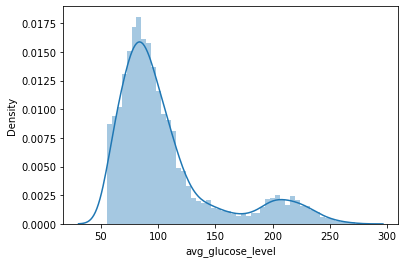

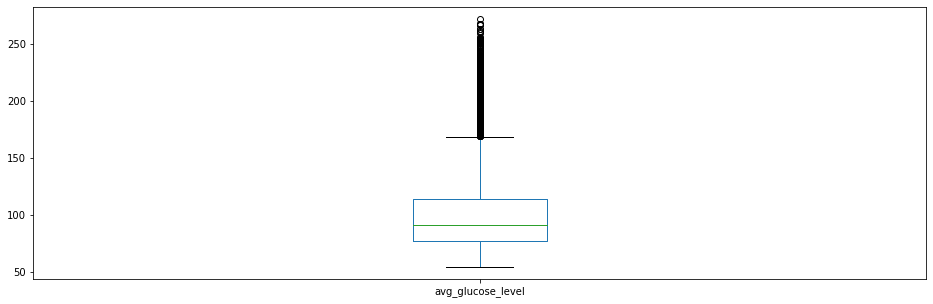

In [34]:
sns.distplot(train_data['avg_glucose_level']) #Glucose level can impact on the output so we visualise in box plot
plt.show()
train_data['avg_glucose_level'].plot.box(figsize=(16,5))
plt.show()        

Text(0.5, 0.98, '')

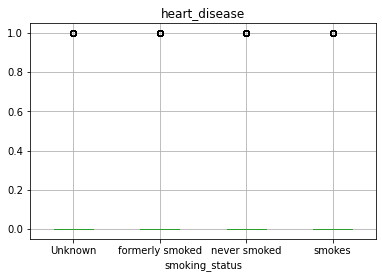

In [35]:
train_data.boxplot(column='heart_disease', by = 'smoking_status')  #comparing the boxplot in terms of Heart diesease with smoking status
plt.suptitle("")

Text(0.5, 0.98, '')

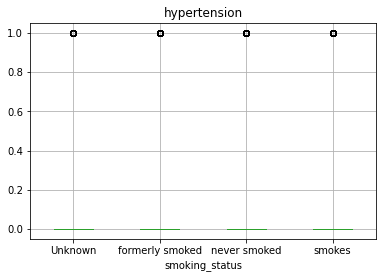

In [36]:
train_data.boxplot(column='hypertension', by = 'smoking_status') 
plt.suptitle("")

# Bivariate Analysis

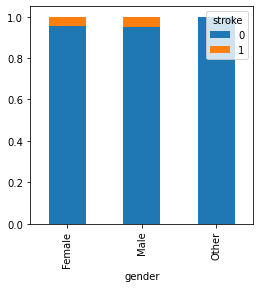

In [37]:
Gender=pd.crosstab(train_data['gender'],train_data['stroke']) # Doing bivariate analysis with gender and stroke for checking the frequency
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4)) # normalize the table
plt.show()

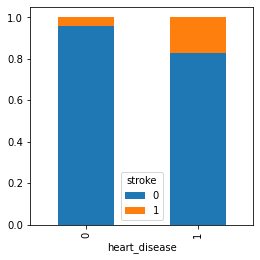

In [38]:
heart=pd.crosstab(train_data['heart_disease'],train_data['stroke']) # Doing bivariate analysis with heart disease and stroke for checking the frequency
heart.div(heart.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4)) 
plt.show()

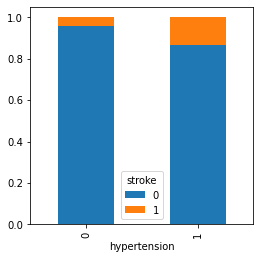

In [39]:
hypo=pd.crosstab(train_data['hypertension'],train_data['stroke']) # Doing bivariate analysis with hypertension and stroke for checking the frequency
hypo.div(hypo.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4)) 
plt.show()

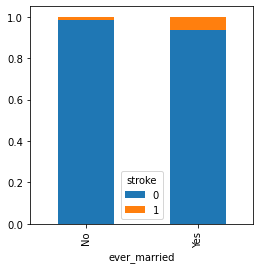

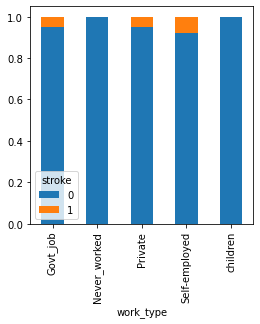

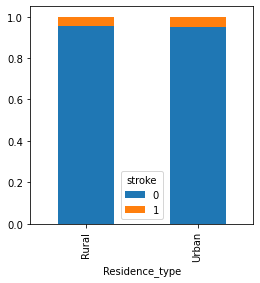

In [40]:
#this is a Bivariate graph for remaining dependent features
Married=pd.crosstab(train_data['ever_married'],train_data['stroke'])   
Working=pd.crosstab(train_data['work_type'],train_data['stroke'])
Residence=pd.crosstab(train_data['Residence_type'],train_data['stroke'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Working.div(Working.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Residence.div(Residence.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

### One Hot Encoding

In [41]:
Work_type = pd.get_dummies(train_data['work_type'])      # Separating the variable using the one hot encoding for the variables with less values
Residence_area = pd.get_dummies(train_data['Residence_type'])
Smoking_status = pd.get_dummies(train_data['smoking_status'])
Gender = pd.get_dummies(train_data['gender'])
Married = pd.get_dummies(train_data['ever_married'])

In [42]:
Work_type

,Govt_job,Never_worked,Private,Self-employed,children
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
5105,0,0,1,0,0
5106,0,0,0,1,0
5107,0,0,0,1,0
5108,0,0,1,0,0


In [43]:
Residence_area

,Rural,Urban
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
5105,0,1
5106,0,1
5107,1,0
5108,1,0


In [44]:
Smoking_status

,Unknown,formerly smoked,never smoked,smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
5105,0,0,1,0
5106,0,0,1,0
5107,0,0,1,0
5108,0,1,0,0


In [45]:
Married

,No,Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
5105,0,1
5106,0,1
5107,0,1
5108,0,1


In [46]:
Gender

,Female,Male,Other
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
5105,1,0,0
5106,1,0,0
5107,1,0,0
5108,0,1,0


# Making New Variable seperate from Dataset

Making new dataset for every column so that we can't interfere with the main dataset

In [47]:
Id = train_data['id']    

In [48]:
Hypertension = train_data['hypertension']

In [49]:
Heart_disease = train_data['heart_disease']

In [50]:
Age = train_data['age']

In [51]:
Avg_glucose_level = train_data['avg_glucose_level']

In [52]:
train_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,37.0,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.0,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.0,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [53]:
Stroke = train_data['stroke']

In [54]:
train_data['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
0.48       3
1.40       3
0.16       3
0.08       2
0.40       2
Name: age, Length: 104, dtype: int64

In [55]:
train_data['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [56]:
train_data['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [57]:
train_data['avg_glucose_level'].value_counts()

93.88     6
72.49     5
84.10     5
91.68     5
83.16     5
         ..
95.02     1
120.09    1
197.58    1
99.91     1
60.50     1
Name: avg_glucose_level, Length: 3979, dtype: int64

In [58]:
train_data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [59]:
Stroke.value_counts()


0    4861
1     249
Name: stroke, dtype: int64

In [60]:
finaldata = pd.concat([Gender, Age, Hypertension, Heart_disease, Married, Work_type, Residence_area, Avg_glucose_level, Bmi, Smoking_status, Stroke],axis=1)
X = finaldata.iloc[:,0:-1] # concatenating the newly created and manipulated columns in new varible and excluding the predicting variable

### Correlation Matrix

<AxesSubplot:>

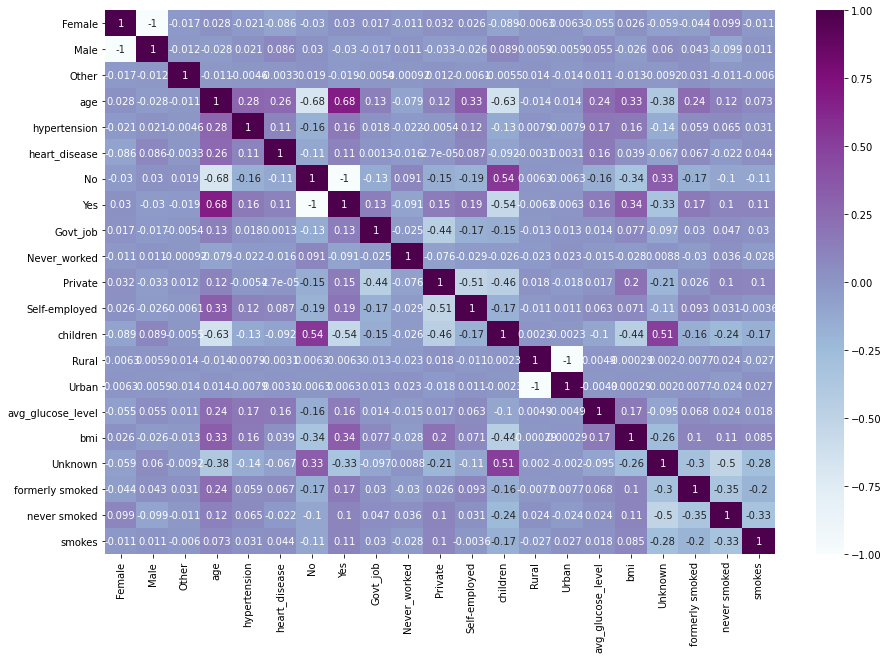

In [61]:
# this shows the important feature required for the analysis as we can see every feature is needed.
corr=X.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")  # visualising the correlation matrix

In [62]:
y = finaldata['stroke']

In [63]:
kbest = SelectKBest(score_func = chi2, k = 'all') # target number of features is defined by k parameter
ordered_features = kbest.fit(X,y)

In [64]:
train_data_scores = pd.DataFrame(ordered_features.scores_, columns=['Score']) # save the scores into a dataFrame

In [65]:
train_data_columns = pd.DataFrame(X.columns, columns = ['Feature_name']) # save the feature names of those scores into a dataFrame

In [66]:
feature_rank = pd.concat([train_data_scores,train_data_columns],axis=1) # combine the two dataFrames

In [67]:
feature_rank.nlargest(12,'Score') # rank the features by score - the scores are based on the chi2 scoring function imported above

,Score,Feature_name
3,3635.226911,age
15,1718.285446,avg_glucose_level
5,87.987436,heart_disease
4,75.449498,hypertension
6,39.355836,No
12,31.111620,children
7,20.622787,Yes
18,17.607359,formerly smoked
11,16.584252,Self-employed
16,15.879229,bmi


### Extra Trees Classifier

In [68]:
# initialise the method

model = ExtraTreesClassifier()
model.fit(X,y) # pass the input and output data to the method

ExtraTreesClassifier()

In [69]:
model.feature_importances_  # compute the scores

array([1.50852334e-02, 1.57031462e-02, 3.16749387e-07, 2.75320681e-01,
       3.09127149e-02, 2.56070155e-02, 7.89691909e-03, 9.16796271e-03,
       1.23054746e-02, 1.85154504e-05, 1.60240539e-02, 1.40040020e-02,
       1.21828391e-03, 1.64421777e-02, 1.59429318e-02, 2.73874067e-01,
       2.09193574e-01, 1.28708345e-02, 1.46831578e-02, 1.81327448e-02,
       1.55961921e-02])

In [70]:
ranked_features = pd.Series(model.feature_importances_, index = X.columns)  # put the scores in a series

<AxesSubplot:>

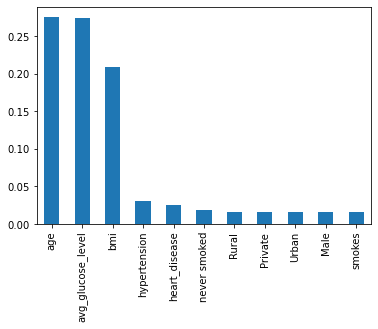

In [71]:
ranked_features.nlargest(11).plot(kind='bar')  # rank and plot the scores

# Mutual Information Gain

In [72]:
mu_ifo = mutual_info_classif(X,y)

In [73]:
mu_data = pd.Series(mu_ifo, index = X.columns)
mu_data.sort_values(ascending=False)

age                  0.036125
Yes                  0.008051
avg_glucose_level    0.006257
heart_disease        0.006204
hypertension         0.005150
children             0.005073
bmi                  0.004936
No                   0.004766
Urban                0.004236
Other                0.001745
Govt_job             0.001648
Female               0.001321
Never_worked         0.000705
Private              0.000494
formerly smoked      0.000453
Rural                0.000000
Self-employed        0.000000
Male                 0.000000
Unknown              0.000000
never smoked         0.000000
smokes               0.000000
dtype: float64

In [74]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [75]:
def classify(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
    model.fit(x_train,y_train)
    print('Accuracy is: ', model.score(x_test,y_test)*100)
    score = cross_val_score(model,x,y,cv=5)                  # we set the number of folds to 5
    print('Cross validation Accuaracy: ', np.mean(score)*100)

In [76]:
LG_model = LogisticRegression()    #making logistic regression model
classify(LG_model, X,y)

Accuracy is:  93.9334637964775
Cross validation Accuaracy:  95.12720156555773


In [77]:
y_pred = LG_model.predict(x_test)

In [78]:
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

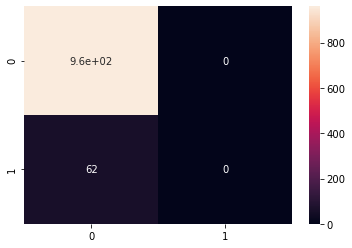

In [79]:
sns.heatmap(cm,annot=True)

In [80]:
knn_model = KNeighborsClassifier(n_neighbors=5)
classify(knn_model,X,y)

Accuracy is:  93.73776908023484
Cross validation Accuaracy:  94.28571428571428


In [81]:
y_pred = knn_model.predict(x_test)

In [82]:
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

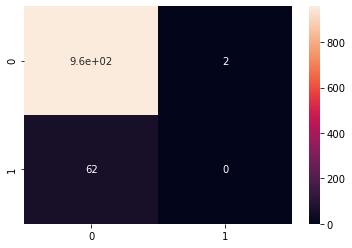

In [83]:
sns.heatmap(cm,annot=True)

In [84]:
SVC_model = SVC(kernel='linear', C = 1)
classify(SVC_model, X,y)

Accuracy is:  93.9334637964775
Cross validation Accuaracy:  95.12720156555773


In [85]:
SVC_model = SVC(kernel='linear', C = 1)

In [86]:
SVC_model.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [87]:
y_pred = SVC_model.predict(x_test) # save predictions in y_pred

In [88]:
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

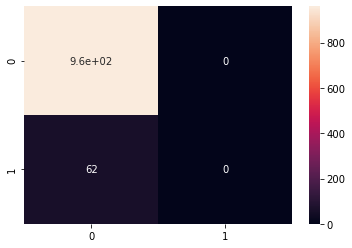

In [89]:
sns.heatmap(cm,annot=True) # plots the confusion matrix

# Trying the same process using Label Encoding

In [90]:
train_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,37.0,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.0,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.0,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,29.0,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,31.0,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,26.0,formerly smoked,0


In [91]:
cols = ['gender','ever_married', 'work_type','Residence_type','smoking_status']
le = LabelEncoder()                       # initialising the necessary function taken from the LabelEncoder library
for col in cols:                         
    train_data[col] = le.fit_transform(train_data[col])

In [92]:
train_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,37.0,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,29.0,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.0,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.0,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,29.0,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,31.0,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,26.0,1,0


In [93]:
corr=train_data.corr()

<AxesSubplot:>

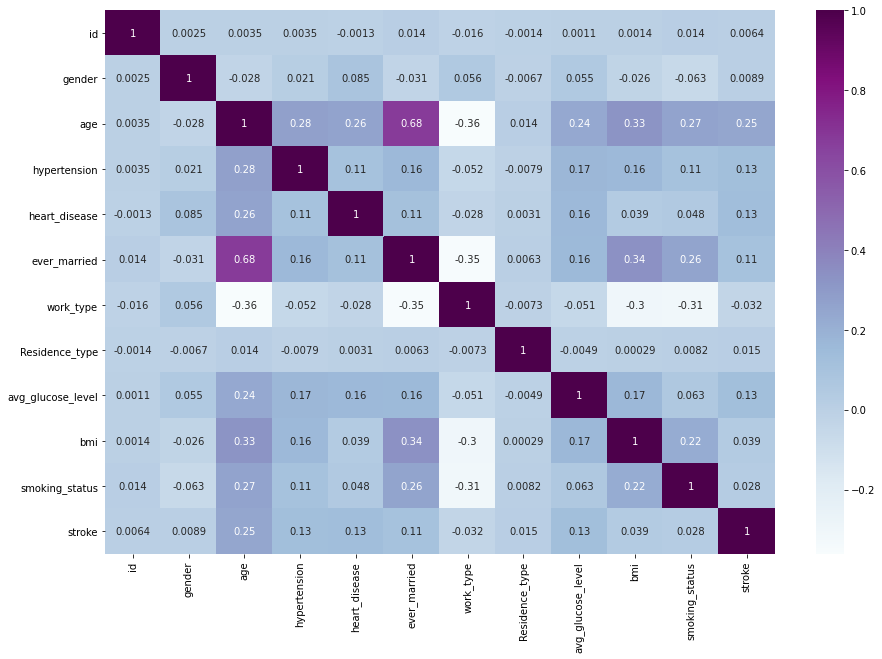

In [94]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [95]:
A = train_data.drop(['stroke'],axis=1)
b = train_data['stroke']

In [96]:
kbest = SelectKBest(score_func = chi2, k = 'all') # target number of features is defined by k parameter
ordered_features = kbest.fit(A,b)

In [97]:
df_scores = pd.DataFrame(ordered_features.scores_, columns=['Score'])

In [98]:
df_columns = pd.DataFrame(X.columns, columns = ['Feature_name'])

In [99]:
feature_rank = pd.concat([df_scores,df_columns],axis=1)

In [100]:
feature_rank.nlargest(12,'Score')

,Score,Feature_name
2,3635.226911,Other
0,2556.735918,Female
8,1718.285446,Govt_job
4,87.987436,hypertension
3,75.449498,age
5,20.622787,heart_disease
9,15.879229,Never_worked
10,3.369423,Private
6,2.925901,No
7,0.600717,Yes


In [101]:
model = ExtraTreesClassifier()
model.fit(A,b)

ExtraTreesClassifier()

In [102]:
model.feature_importances_

array([0.17932645, 0.03142367, 0.20624864, 0.02317516, 0.02318449,
       0.01660314, 0.05738771, 0.03673533, 0.19037076, 0.15401823,
       0.08152642])

In [103]:
ranked_features = pd.Series(model.feature_importances_, index = A.columns) 

<AxesSubplot:>

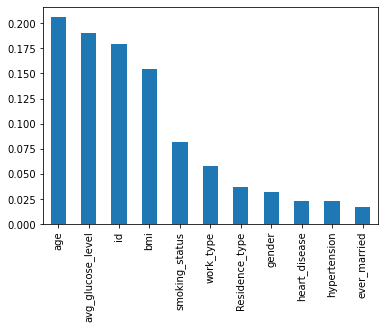

In [104]:
ranked_features.nlargest(12).plot(kind='bar')  # rank and plot the scores

In [105]:
mu_ifo = mutual_info_classif(A,b)
mu_data = pd.Series(mu_ifo, index = A.columns)
mu_data.sort_values(ascending=False)

age                  0.034894
work_type            0.011995
heart_disease        0.010218
bmi                  0.008821
smoking_status       0.007195
id                   0.005207
avg_glucose_level    0.005163
hypertension         0.004164
ever_married         0.001049
Residence_type       0.001045
gender               0.000000
dtype: float64

In [106]:
a_train,a_test,b_train,b_test = train_test_split(A,b, test_size = 0.2, random_state=42)

In [107]:
def classify(model, a, b):
    a_train,x_test,b_train,b_test = train_test_split(A,b, test_size = 0.2, random_state=42)
    model.fit(a_train,b_train)
    print('Accuracy is: ', model.score(a_test,b_test)*100)
    score = cross_val_score(model,a,b,cv=5)                  # we set the number of folds to 5
    print('Cross validation Accuaracy: ', np.mean(score)*100)

In [108]:

LG_model = LogisticRegression()
classify(LG_model, A,b)

Accuracy is:  93.9334637964775
Cross validation Accuaracy:  95.06849315068493


In [109]:
b_pred = LG_model.predict(a_test)

In [110]:
com = confusion_matrix(b_test,b_pred)

<AxesSubplot:>

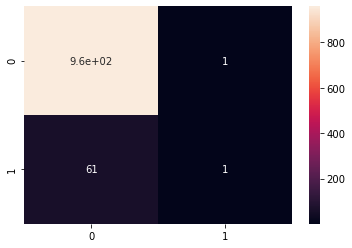

In [111]:
sns.heatmap(com,annot=True) # plots the confusion matrix

In [112]:

knn_model = KNeighborsClassifier(n_neighbors=5)
classify(knn_model,A,b)

Accuracy is:  93.9334637964775
Cross validation Accuaracy:  95.12720156555773


In [113]:
b_pred = knn_model.predict(a_test)

In [114]:
com = confusion_matrix(b_test,b_pred)

<AxesSubplot:>

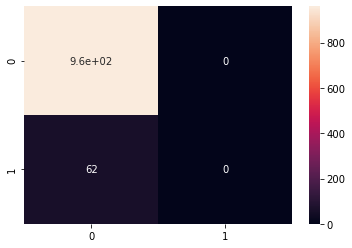

In [115]:
sns.heatmap(com,annot=True) # plots the confusion matrix

In [116]:

SVC_model = SVC(kernel='linear', C = 1)
classify(SVC_model, A,b)

Accuracy is:  93.34637964774952
Cross validation Accuaracy:  94.28571428571428


In [117]:
SVC_model = SVC(kernel='linear', C = 1)

In [118]:
SVC_model.fit(a_train,b_train)

SVC(C=1, kernel='linear')

In [119]:
b_pred = SVC_model.predict(a_test) # save predictions in y_pred

In [120]:
com = confusion_matrix(b_test,b_pred)

<AxesSubplot:>

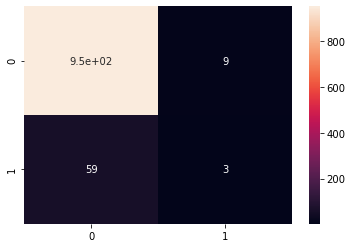

In [121]:
sns.heatmap(com,annot=True) # plots the confusion matrix

# THANK YOU